<a href="https://colab.research.google.com/github/aubricot/computer_vision_with_eol_images/blob/master/utils/display_EOLbundle_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inspect EOL bundle images while preparing training datasets and pipelines
---
*Last updated on 18 August 2025*  
Inspecting training data is important for designing pipelines. Use this notebook to visualize images in EOL bundles before downloading them to Google Drive. Pay attention to image quality, size of objects of interest, colors, taxonomic groups present, etc.

## Import libraries and Define functions
---

In [ ]:
# For working with data and reading/displaying images
import itertools
import os
import numpy as np
import pandas as pd
from skimage.transform import resize
import matplotlib.pyplot as plt
import time
import tensorflow as tf
import socket # Set number of seconds to timeout if image url taking too long to open
socket.setdefaulttimeout(10)

# To load in image from URL
# Modified from https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/guide/saved_model.ipynb#scrollTo=JhVecdzJTsKE
def image_from_url(url, fn):
    file = tf.keras.utils.get_file(fn, url) # Filename doesn't matter
    disp_img = tf.keras.preprocessing.image.load_img(file)
    img = tf.keras.preprocessing.image.load_img(file, target_size=[224, 224])
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = tf.keras.applications.mobilenet_v2.preprocess_input(
        x[tf.newaxis,...])
    return x, disp_img

# To read in EOL formatted data files
def read_datafile(fpath, sep="\t", header=0, disp_head=True):
    try:
        df = pd.read_csv(fpath, sep=sep, header=header)
        if disp_head:
          print("Data header: \n", df.head())
    except FileNotFoundError as e:
        raise Exception("File not found: Enter the path to your file in form field and re-run").with_traceback(e.__traceback__)

    return df

## Display images
---

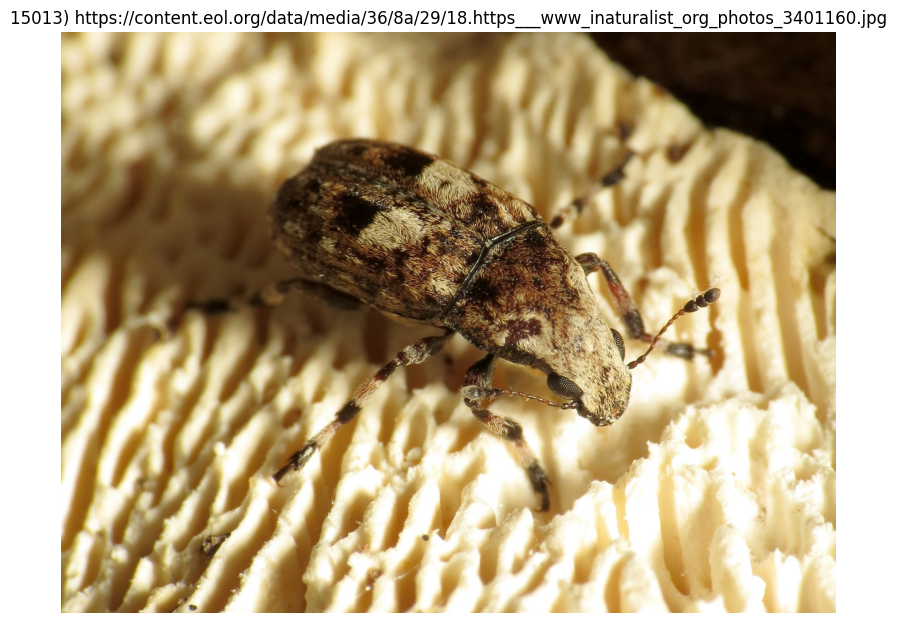

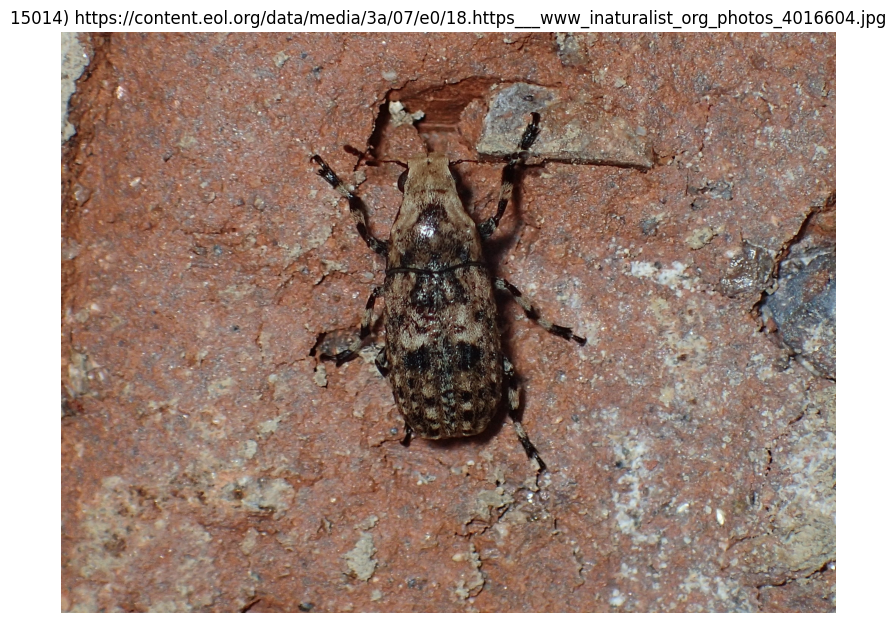

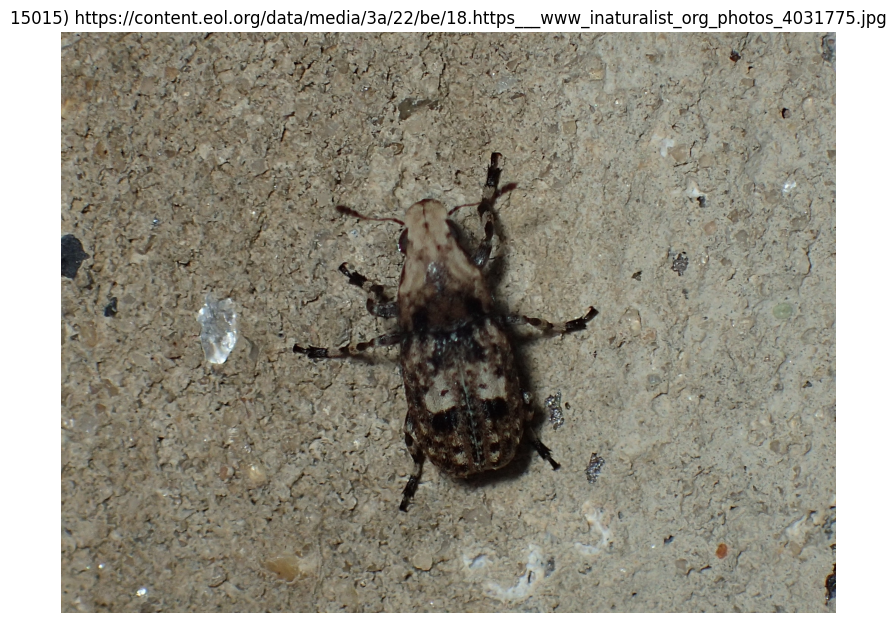

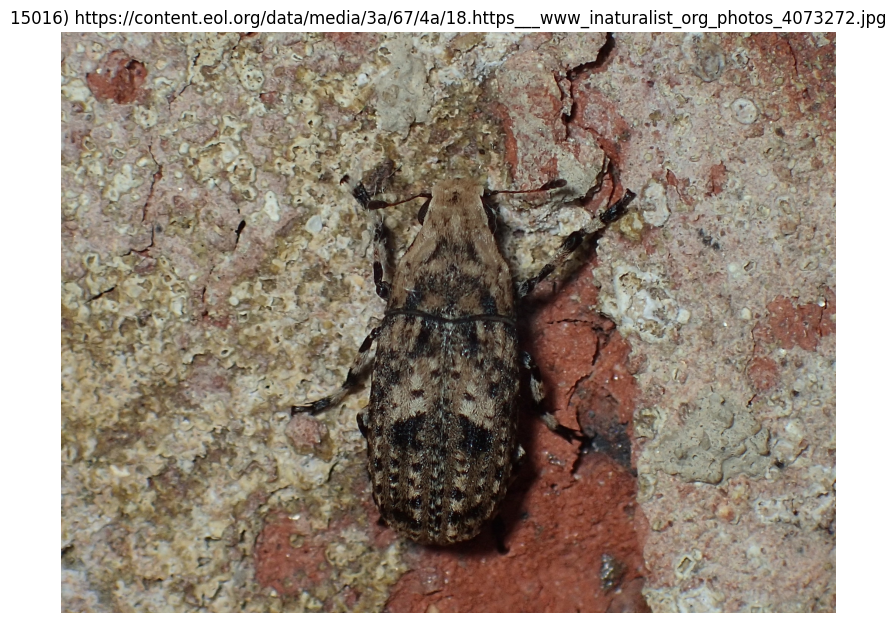

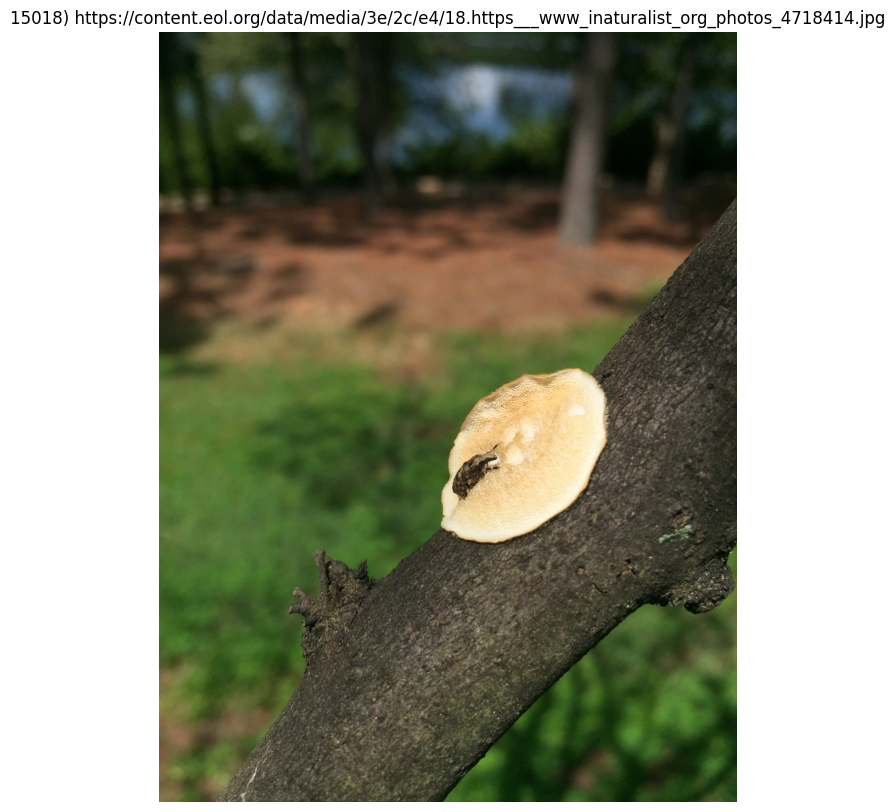

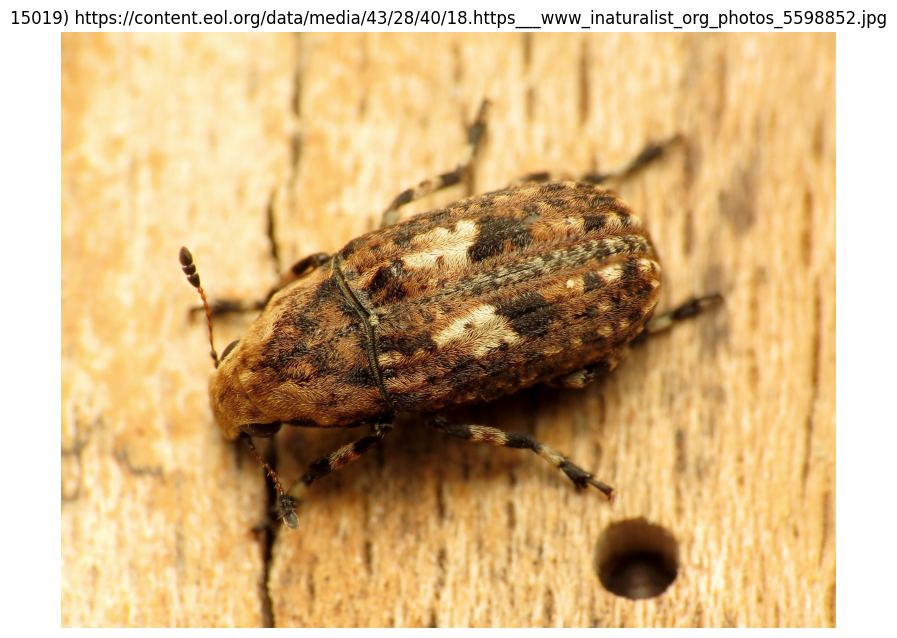

In [ ]:
# Read in EOL image bundle dataframe
# Type in image bundle url using form field to right
bundle = "https://editors.eol.org/other_files/bundle_images/files/images_for_Coleoptera_20K_breakdown_000001.txt" #@param ["https://editors.eol.org/other_files/bundle_images/files/images_for_Coleoptera_20K_breakdown_000001.txt"] {allow-input: true}
df = read_datafile(bundle)
print("EOL image bundle: \n", df.head())

# Set start and end rows to run inference for from EOL image bundle using form field to right
start =  15000 #@param {type:"integer"}
no_imgs = 50 #@param {type:"slider", min:0, max:50, step:5}
end =  start + no_imgs

# Loop through EOL image bundle to classify images and generate tags
for i, row in df.iloc[start:end].iterrows():
  try:
    # Get url from image bundle
    url = df['eolMediaURL'][i]
    # Read in image from url
    fn = str(i) + '.jpg'
    img, disp_img = image_from_url(url, fn)

    # Show classification results for images
    _, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(disp_img)
    plt.axis('off')
    plt.title("{}) {}".format(i, url))

  except:
    print('Check if URL from {} is valid'.format(url))